In [2]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

import pandas as pd
import matplotlib.pyplot as plt
from configs import model_size, support_llms, get_model_category
import numpy as np

df  = pd.read_pickle(f"{root_dir}/results/results.pkl")

df.head()

,_runtime,_step,_timestamp,_wandb,accuracy,calibrated_accuracy,consistency_rate,seed,wandb,api_key,...,n_per_class,prompt_name,dataset_name,max_new_tokens,n_pairs,context,example,not_load_model,run_name,run_id
0,9.677576,0,1.727936e+09,{'runtime': 9},0.250,NaN,NaN,42,True,yz,...,2,yn,memotion,NaN,NaN,NaN,NaN,NaN,frosty-oath-5,fryv8q8r
1,150.268406,0,1.727937e+09,{'runtime': 150},0.500,NaN,NaN,42,True,yz,...,50,yn,memotion,NaN,NaN,NaN,NaN,NaN,lucky-moon-6,zog6po9e
2,423.607283,0,1.727937e+09,{'runtime': 423},0.000,NaN,NaN,42,True,yz,...,2,yn,memotion,NaN,NaN,NaN,NaN,NaN,driven-forest-7,jjpnrfnu
3,114.574776,0,1.727937e+09,{'runtime': 114},0.560,NaN,NaN,42,True,yz,...,50,yn,memotion,NaN,NaN,NaN,NaN,NaN,zany-field-8,tre6uqym
4,555.219650,0,1.727938e+09,{'runtime': 555},0.515,NaN,NaN,42,True,yz,...,100,yn,memotion,NaN,NaN,NaN,NaN,NaN,scarlet-dream-9,eu2yqz7u


In [3]:
def get_row(**kwargs):
    condition = None
    for key, value in kwargs.items():

        if condition is None:
            condition = df[key] == value
        else:
            condition &= df[key] == value
    return df[condition].reset_index(drop=True)

In [10]:
model_list = [
    "Llama-3.2-11B-Vision-Instruct",
    "Llama-3.2-90B-Vision-Instruct",
    "Pixtral-12B-2409",
]

In [17]:
result_dfs = {}

for model_name in model_list:
    result_dfs[model_name] = get_row(
        model_name = model_name,
        dataset_name='ours_v2', 
        eval_mode='pairwise', 
        description = '',
    )

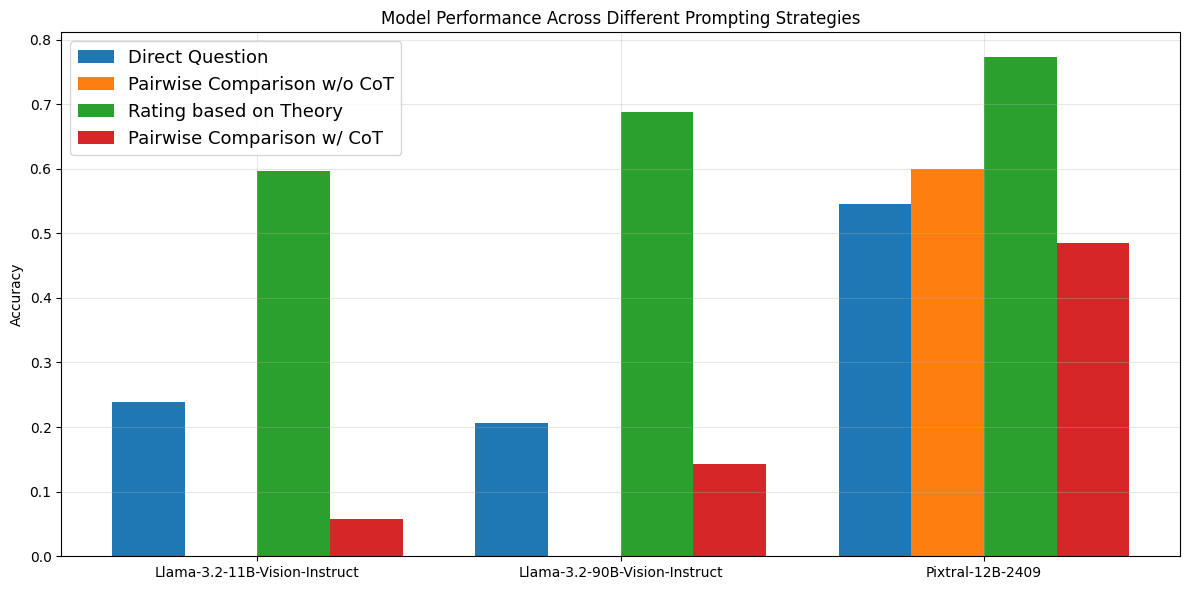

In [29]:
prompt_names = {
    'single': "Direct Question", 
    'standard': "Pairwise Comparison w/o CoT", 
    'theory': "Rating based on Theory", 
    'cot': "Pairwise Comparison w/ CoT",
}
x = np.arange(len(model_list))
width = 0.2

fig, ax = plt.subplots(figsize=(12, 6))

for i, prompt_name in enumerate(prompt_names):
    accuracies = []
    for model_name in model_list:
        df_model = result_dfs[model_name]
        acc = df_model[df_model['prompt_name'] == prompt_name]['accuracy'].values
        accuracies.append(acc[0] if len(acc) > 0 else 0)
    
    ax.bar(x + (i-1.5)*width, accuracies, width, label=prompt_names[prompt_name])

ax.set_ylabel('Accuracy')
ax.set_title('Model Performance Across Different Prompting Strategies')
ax.set_xticks(x)
ax.set_xticklabels([model for model in model_list], rotation=0)
ax.legend(fontsize=13)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
